In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# predicting employee salary based on experience

salary = pd.read_csv("Employee_salary.csv")
salary.tail(10)

,Years of Experience,Salary
1990,18.583977,374277.2253
1991,18.806528,390051.2268
1992,18.817387,392165.2403
1993,19.063416,413149.8396
1994,19.164009,420555.4056
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [10]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [11]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


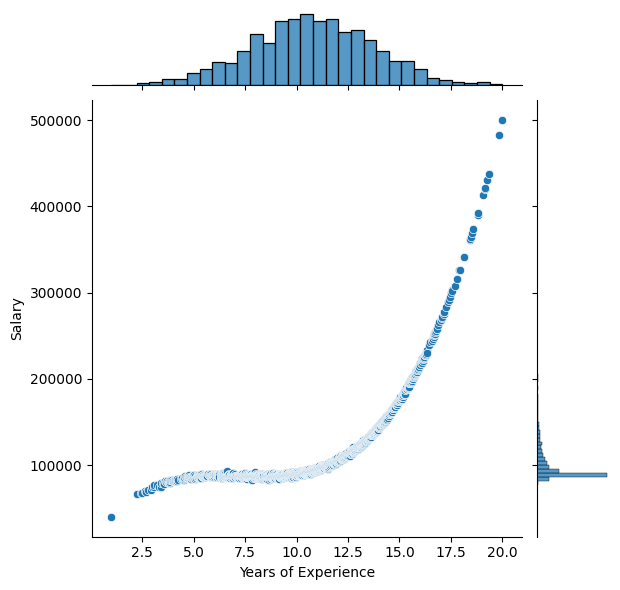

In [12]:
# visualizing dataset
sns.jointplot(x = 'Years of Experience', y = 'Salary', data=salary)

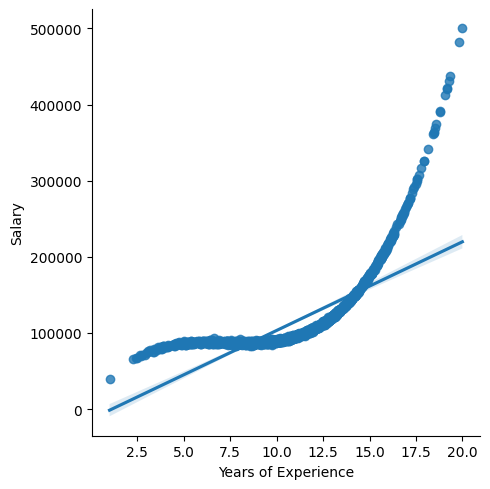

In [13]:
sns.lmplot(x = 'Years of Experience', y = 'Salary', data=salary)

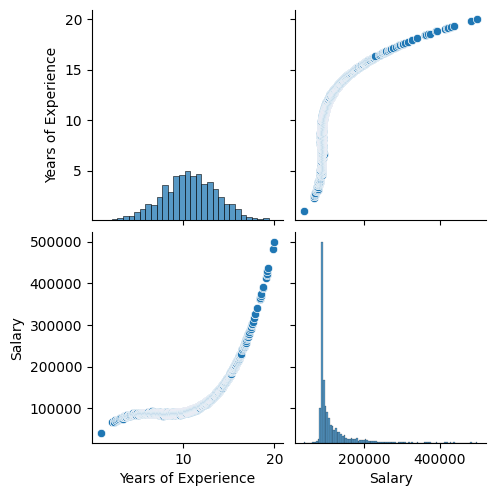

In [14]:
sns.pairplot(salary)

In [15]:
# create training dataset
X = salary[['Years of Experience']]
X.shape

(2000, 1)

In [16]:
Y = salary[['Salary']]
Y.shape

(2000, 1)

In [17]:
# assign training and testing data
X_train = X
y_train = Y

In [18]:
# linear assumption
from sklearn.linear_model import LinearRegression


In [20]:
regressor = LinearRegression(fit_intercept=True)


In [21]:
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Slope of the graph(Coefficient -m): ', regressor.coef_)
print('Linear model Intercept (b): ',regressor.intercept_)

Slope of the graph(Coefficient -m):  [[11640.22916165]]
Linear model Intercept (b):  [-13063.09931519]


Text(0.5, 1.0, 'Salary vs Years of Experience (Linear Assumption)')

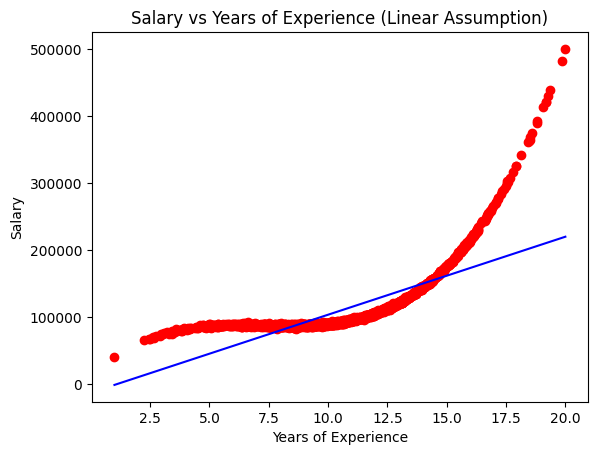

In [23]:
# visualize the results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Linear Assumption)')

In [40]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [72]:
poly_regressor = PolynomialFeatures(degree = 2)

In [74]:
X_columns = poly_regressor.fit_transform(X_train) # transform X_train column to multiple array of features

In [75]:
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [76]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [77]:
print('Model Coefficient: ', regressor.coef_)

Model Coefficient:  [[     0.         -33106.32895617   2095.78613853]]


In [78]:
# increasing the degree
poly_regressor2 = PolynomialFeatures(degree = 5)

In [79]:
X2_columns = poly_regressor2.fit_transform(X_train)
X2_columns # note columns increases

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [80]:
regressor2 = LinearRegression()
regressor2.fit(X2_columns, y_train)

LinearRegression()

In [82]:
print('Model Coefficient: ', regressor2.coef_) # increases coeff

Model Coefficient:  [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  -1.03521070e+00  2.09284278e-02]]


In [83]:
# predict y values
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

Text(0.5, 1.0, 'Salary vs Years of Experience (Polynomial Assumption degree = 2)')

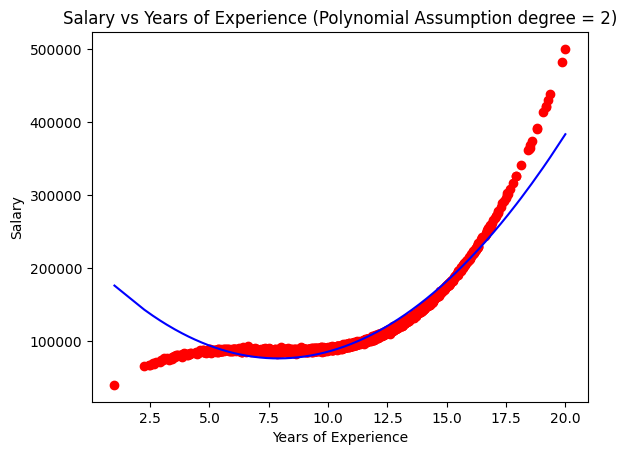

In [88]:
# visualizing results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Polynomial Assumption degree = 2)')

In [87]:
y_predict2 = regressor2.predict(poly_regressor2.fit_transform(X_train))

Text(0.5, 1.0, 'Salary vs Years of Experience (Polynomial Assumption degree = 5)')

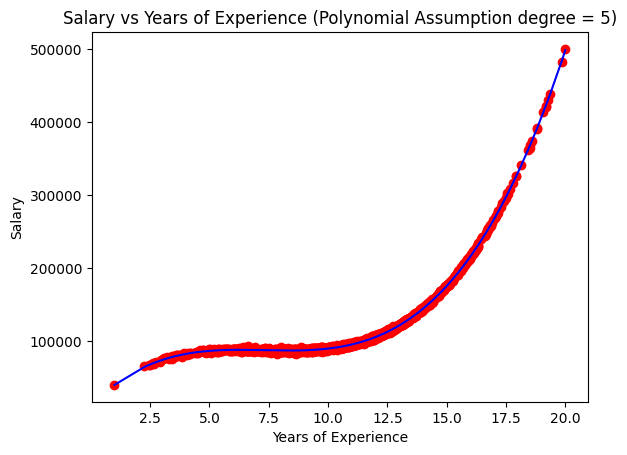

In [89]:
# visualizing results where degree is increased to 5
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict2, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Polynomial Assumption degree = 5)')